## **Disease Classification Model**

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients.We will use the  healthcare datasets provided to accomplish the following task

**Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.**

What is hypothyroidism?

A condition in which the thyroid gland doesn't produce enough thyroid hormone.

For more information about the condition click [here](https://www.healthline.com/health/hypothyroidism/symptoms-treatments-more)

1.Define the question, 2.find the metric for success,3. establish and explain the context,4. expound on the experimental design taken and 5. shed light on the appropriateness of the available data to answer the given question . We will also find and deal with outliers, anomalies, and missing data within the dataset if any. We will also Perform univariate, bivariate and multivariate analysis recording your observations each of the analyses. We will use Barlets Test to check for Multicolinearity. Lastly n the analysis , we will Implement the solution

# **1.Define the question**

Nairobi Hospital conducted a clinical camp to test for **hypothyroidism**. The data collected focused on Thyroid patients.We will use the  healthcare datasets provided to accomplish the following task

**Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.**

## **a. Specifying the Question.**

Using Machine Learning algorithms Decision Trees and Support Vector Machines we will build models that give distinctions between the children with Hypothyroid and with those without.

## **b. Defining the metric of success**

The metric of success would to be:
1. To get a high percentage accuracy in the model.
2. To have a clear distinction of those who had hypothyroid and those without

## **c. Understanding the Context.**

the data abtained recorded those who had the condition and those who did not from the tests done. Hence this is a classification problem.

## **d.Record the experiment design**

We shall 


> 1. perform normal EDA  tasks
> 2. Use decision trees to Classify the status results of the test.
> 3. Use SVM and its different types of Kernel to build models to display the status results of the test


## **e. Data relevance**

The data is very much relevant to the question.The dataset columns are helpful to create the models

# **2. Read the Data**

### a. import our dependencies

In [0]:
#Numpy is a library for python that supports multidimensional arrays and matrices as well as mathematical functions
import numpy as np
#Pandas is Python library used for data manipulation and data analysis
import pandas as pd
#matplotlib is used for plotting graphs
import matplotlib.pyplot as plt
#Seaborn is used for plotting graphs also.
import seaborn as sns
from sklearn.preprocessing import  StandardScaler
#is the scikit learn algorithm for splitting datasets into training and testing sets
from sklearn.model_selection import train_test_split
from scipy.stats import randint as sp_randint
from sklearn.metrics import accuracy_score
#Is a scikit learn dependency used  to display the matrix to account for model accuracies
from sklearn.metrics import  confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
# Import Random Forest Classifier alogorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
 #The interpreter saves the arguments for all supplied entries without interpretation in sys
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 5000)



### b. Importing the data

In [0]:
#importing the data using pandas and read_CSV function to convert to pandas Dataframe
disease = pd.read_csv('http://bit.ly/hypothyroid_data')

### c. Check the Data

In [0]:
#Checking the first five rows of the dataset.
disease.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [0]:
#checking the last five items in the dataset.
disease.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [0]:
#Summaries of the Numerical Data
disease.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [0]:
#Check the shape i.e the rows and columns 
print('The total number of rows in the disease dataset is : \n{}'.format(disease.shape[0]))
print('The total number of columns in the disease dataset is: \n {}'.format(disease.shape[1]))

The total number of rows in the disease dataset is : 
3163
The total number of columns in the disease dataset is: 
 26


In [0]:
#Summary of the data in terms of Data types , column names and Non null values.
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [0]:
#Checking our columns
disease.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'], dtype='object')

Status

Age - Age of the tested patients

Sex - the gender of the tested patients

on_thyroxine - this is condition when the tested is taking thyroid boosting hormone medications . Is either true or false

query_on_thyroxine - 

on_antithyroid_medication

thyroid_surgery

query_hypothyroid

query_hyperthyroid

pregnant

sick

tumor

lithium

goitre

TSH_measured

TSH

T3_measured

T3

TT4_measured

TT4

T4U_measured

T4U

FTI_measured

FTI

TBG_measured


TBG


In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

disease['query_on_thyroxine']= le.fit_transform(disease['query_on_thyroxine'])
disease['on_thyroxine']= le.fit_transform(disease['on_thyroxine'])
disease['pregnant']= le.fit_transform(disease['pregnant'])
disease['on_antithyroid_medication']= le.fit_transform(disease['on_antithyroid_medication'])
disease['thyroid_surgery']= le.fit_transform(disease['thyroid_surgery'])
disease['goitre']= le.fit_transform(disease['goitre'])
disease['query_hypothyroid']= le.fit_transform(disease['query_hyperthyroid'])
disease['FTI_measured']= le.fit_transform(disease['FTI_measured'])
disease['query_hyperthyroid'] = le.fit_transform(disease['query_hyperthyroid'])
disease['T4U_measured']= le.fit_transform(disease['T4U_measured'])
disease['sick']= le.fit_transform(disease['sick'])
disease['tumor']= le.fit_transform(disease['tumor'])
disease['TT4_measured']= le.fit_transform(disease['TT4_measured'])
disease['TSH_measured']= le.fit_transform(disease['TSH_measured'])
disease['T3_measured']= le.fit_transform(disease['T3_measured'])
disease['lithium']= le.fit_transform(disease['lithium'])
disease['TBG_measured']= le.fit_transform(disease['TBG_measured'])


In [0]:
#Some columns with numerical values had a difficulty converting them hence , we will adapt a function to do the changes
# We will then convert the remaining numeric columns to int datatypes

cols = ['TT4','T3','TBG','FTI']

# We will  again use  the Label encoder to convert our numerical values to integers
#Having already imported  Label encoder and le_ we shall assign the above list to the function.
#function to change to numerics
for i, j in enumerate(cols):
  disease[j] = le.fit_transform(disease[j])

disease.shape
#Error, will check this later.

In [0]:
#checking if our selected items have changed datatype to int.
disease.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                  int64
query_on_thyroxine            int64
on_antithyroid_medication     int64
thyroid_surgery               int64
query_hypothyroid             int64
query_hyperthyroid            int64
pregnant                      int64
sick                          int64
tumor                         int64
lithium                       int64
goitre                        int64
TSH_measured                  int64
TSH                          object
T3_measured                   int64
T3                           object
TT4_measured                  int64
TT4                          object
T4U_measured                  int64
T4U                          object
FTI_measured                  int64
FTI                          object
TBG_measured                  int64
dtype: object

### **External Data Source Validation**

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here

# **3.Cleaning Data**

### a. Check for missing values

In [0]:
disease.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

### **b. Checking for Duplicates**

In [0]:
disease.duplicated().sum()

77

In [0]:
disease = disease.drop_duplicates()

### **c.Removing question marks(Anomalies)**

We want to show the number of missing Data that has question Marks (?). We will use the function below.

In [0]:
#We will use length to calculate the number of columns with the question mark.
len(disease.loc[(disease['TSH'] =='?')
|
(disease['TSH']  =='?')
|
(disease['T3']  =='?')
|
(disease['age']  =='?')
|
(disease['TT4']  =='?')
|            
(disease['T4U']  =='?')
|             
(disease['FTI']  =='?')
|
(disease['TBG']  =='?')])

3084

This means 3084 Rows our of 3161 have missing values.


In [0]:
#Print out the rows containing Missing values
(disease.loc[(disease['TSH'] =='?')
|
(disease['TSH']  =='?')
|
(disease['T3']  =='?')
|
(disease['age']  =='?')
|
(disease['TT4']  =='?')
|            
(disease['T4U']  =='?')
|             
(disease['FTI']  =='?')
|
(disease['TBG']  =='?')])

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


In [0]:
#For all remaining ? marks , we will first convert them to Null values , and then drop them
disease = disease.replace({'?':np.nan})
disease.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

TBG has most ? marks hence, we will drop it first.

In [0]:
disease = disease.drop(columns='TBG')

In [0]:
#So far we have lost one column , and 77 rows. To confirm ,
disease.shape

(3086, 25)

In [0]:
#Drop the rest of the null values
disease1 = disease.dropna()

In [0]:
disease1.shape

(1946, 25)

### **d.Transfering the new dataset**

In [0]:
#Put the column into a CSV
disease1.to_csv('disease1.csv')

# 4.Exploratory Data Analysis

***Exploratory data analysis (EDA)***:

---



Is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

### **a. Univariate**

---




Univariate - Univariate analysis is the simplest form of data analysis where the data being analyzed contains only one variable

Since most of our data is categorial, we shall plot Univariate bar plots for each variable in the hypothyroid Dataset.

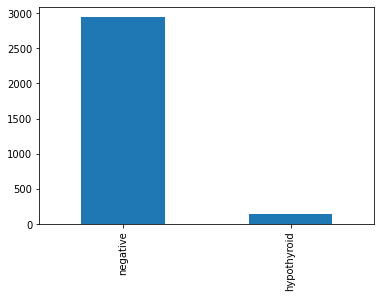

In [0]:
disease['status'].value_counts().head(20).plot.bar()

Most of the Status after clinical camp test  were negative

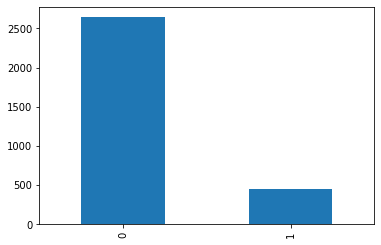

In [0]:
disease['on_thyroxine'].value_counts().head(20).plot.bar()

The On- thyroxine had more false results more than true results

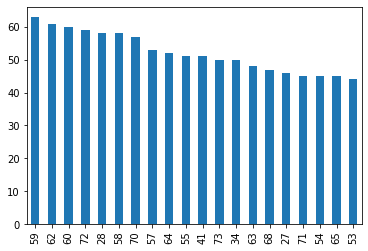

In [0]:
disease['age'].value_counts().head(20).plot.bar()

People aged 59,62,60,72 and 58 were the top ages to take the test.

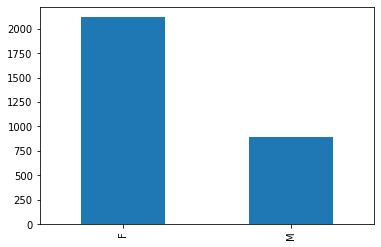

In [0]:
disease['sex'].value_counts().head(20).plot.bar()

Most Females took the test , than males(Almost Double)

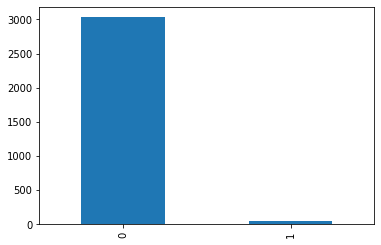

In [0]:
disease['query_on_thyroxine'].value_counts().head(20).plot.bar()

More than 90 percent answered False for query on Thyroxine.

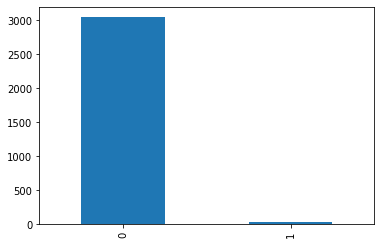

In [0]:
disease['on_antithyroid_medication'].value_counts().head(20).plot.bar()

Most of the one who took the test answered they were not on antithyroid medication. Abut only 7- around 10 % were on the medication

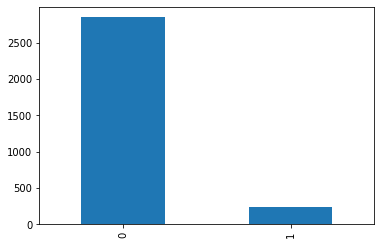

In [0]:
disease['query_hypothyroid'].value_counts().head(20).plot.bar()

On the query of hypothyroid , most of the answers were false

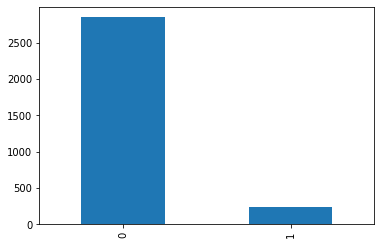

In [0]:
disease['query_hyperthyroid'].value_counts().head(20).plot.bar()

Most of the answers on hyperthyroid is false

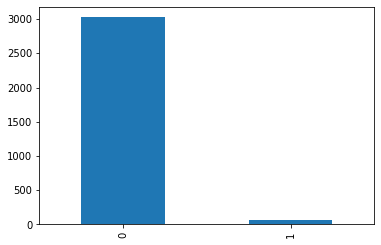

In [0]:
disease['pregnant'].value_counts().head(20).plot.bar()

The most answers from the females of if one was pregnant is False.

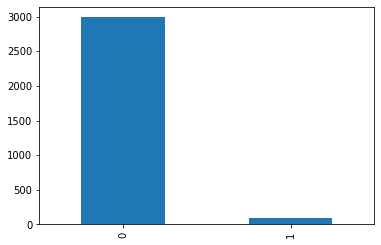

In [0]:
disease['sick'].value_counts().head(20).plot.bar()

Most of the people were false on being sick.

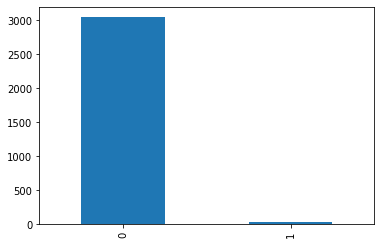

In [0]:
disease['tumor'].value_counts().head(20).plot.bar()

Were very few responses about having Tumor to those who do not have.

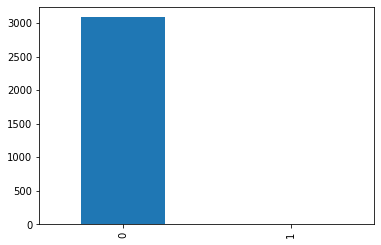

In [0]:
disease['lithium'].value_counts().head(20).plot.bar()

None of the people answered positive on Lithium

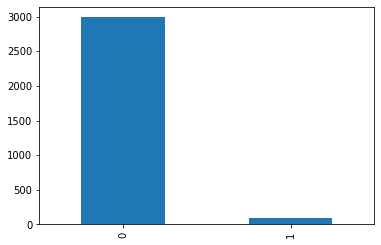

In [0]:
disease['goitre'].value_counts().head(20).plot.bar()

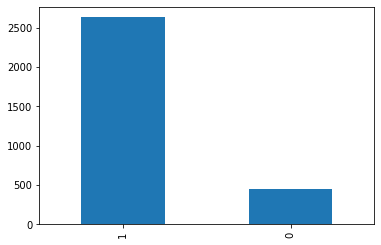

In [0]:
disease['TSH_measured'].value_counts().head(20).plot.bar()

A high percentage of the TSH measured came as Yes.

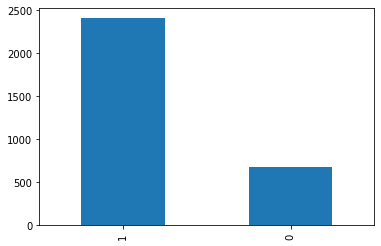

In [0]:
disease['T3_measured'].value_counts().head(20).plot.bar()

Most results came as Yes in T3 measured.

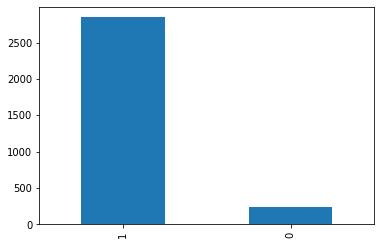

In [0]:
disease['TT4_measured'].value_counts().head(20).plot.bar()

Most People had a Yes on TT4 Measured.

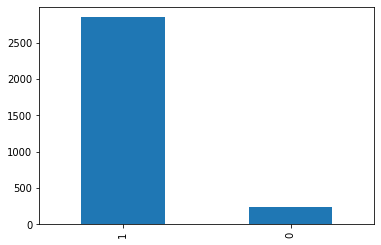

In [0]:
disease['T4U_measured'].value_counts().head(20).plot.bar()

Most T4 u measured came as Yes.

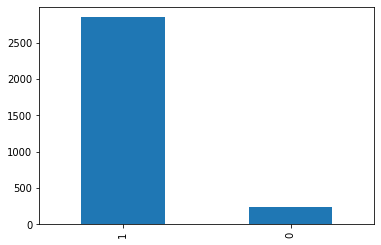

In [0]:
disease['FTI_measured'].value_counts().head(20).plot.bar()

Most FTI measured came as Yes in the results

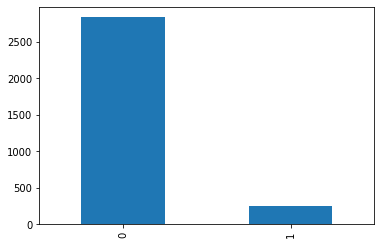

In [0]:
disease['TBG_measured'].value_counts().head(20).plot.bar()

TBG Measured is mostly No on the results.

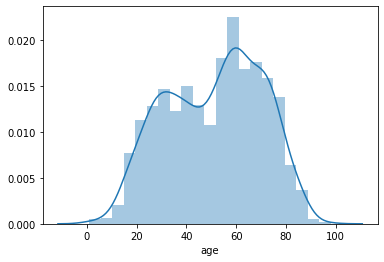

In [0]:
# Plotting a distplot to visaualize our age column

sns.distplot(disease.age);

Most of the People are between ages 50-75

IndexError: ignored

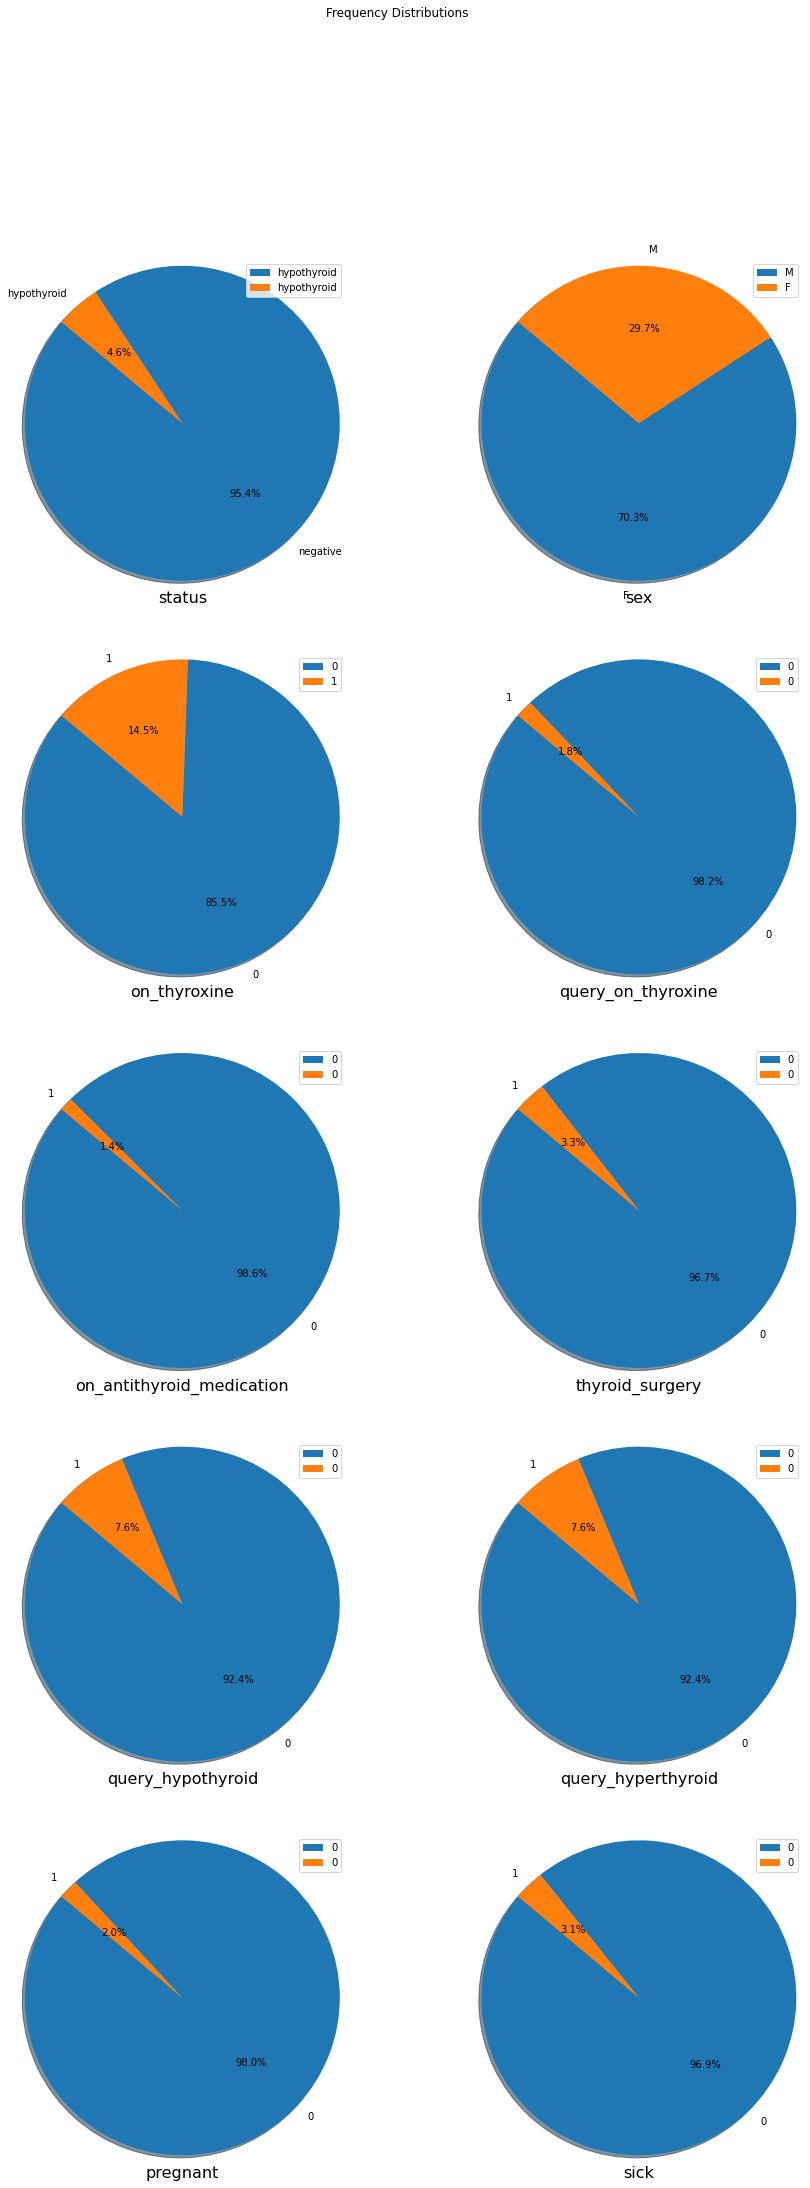

In [0]:
categorical = ['status',  'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']

#plotting our frequencies on pie charts to visualise our percentage distributions
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5,2, figsize=(15, 35))
fig.suptitle('Frequency Distributions')
axes_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10 ]


#iterating our columns as we plot
for i, col in enumerate(categorical):
    axes_list[i].pie(disease[col].value_counts(), labels=disease[col].value_counts().keys(), autopct='%1.1f%%',radius=1.2, shadow=True, startangle=140)
    axes_list[i].set_xlabel(col, fontsize=16)
    axes_list[i].legend(disease[col], loc='best')

###**b.Bivariate**

Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them.

i). Correlation

In [0]:
corr = disease.corr()
corr

,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured
on_thyroxine,1.000000,-0.013574,-0.024418,0.031370,-0.086734,-0.086734,0.001219,-0.063480,-0.022658,-0.010467,-0.025874,0.069553,-0.161697,0.057418,0.057030,0.060094,-0.061614
query_on_thyroxine,-0.013574,1.000000,-0.015823,0.015876,-0.038674,-0.038674,-0.019129,-0.024267,0.049524,-0.003430,0.004078,-0.109774,-0.087931,0.039118,0.039030,0.038941,-0.040082
on_antithyroid_medication,-0.024418,-0.015823,1.000000,-0.006256,0.124440,0.124440,0.003412,-0.021160,-0.013461,-0.002991,-0.021048,-0.030035,-0.018524,-0.049433,-0.049670,-0.049909,0.046900
thyroid_surgery,0.031370,0.015876,-0.006256,1.000000,0.021470,0.021470,-0.013427,-0.033475,-0.021294,-0.004732,-0.022904,0.036567,0.007382,0.006806,0.006594,0.006381,-0.009091
query_hypothyroid,-0.086734,-0.038674,0.124440,0.021470,1.000000,1.000000,0.073329,-0.051720,-0.032900,-0.007311,0.040038,-0.135600,-0.036012,-0.094539,-0.095068,-0.095600,0.106757
query_hyperthyroid,-0.086734,-0.038674,0.124440,0.021470,1.000000,1.000000,0.073329,-0.051720,-0.032900,-0.007311,0.040038,-0.135600,-0.036012,-0.094539,-0.095068,-0.095600,0.106757
pregnant,0.001219,-0.019129,0.003412,-0.013427,0.073329,0.073329,1.000000,-0.025581,0.004308,-0.003616,0.081827,0.006526,0.030561,-0.002225,-0.002402,-0.002579,0.000328
sick,-0.063480,-0.024267,-0.021160,-0.033475,-0.051720,-0.051720,-0.025581,1.000000,-0.020644,-0.004588,-0.032279,0.048724,0.077847,0.031509,0.031351,0.031193,-0.033220
tumor,-0.022658,0.049524,-0.013461,-0.021294,-0.032900,-0.032900,0.004308,-0.020644,1.000000,-0.002918,-0.020534,-0.033149,-0.008198,0.011883,0.011767,0.022389,-0.023617
lithium,-0.010467,-0.003430,-0.002991,-0.004732,-0.007311,-0.007311,-0.003616,-0.004588,-0.002918,1.000000,-0.004563,0.010590,0.013538,0.007395,0.007378,0.007362,-0.007577


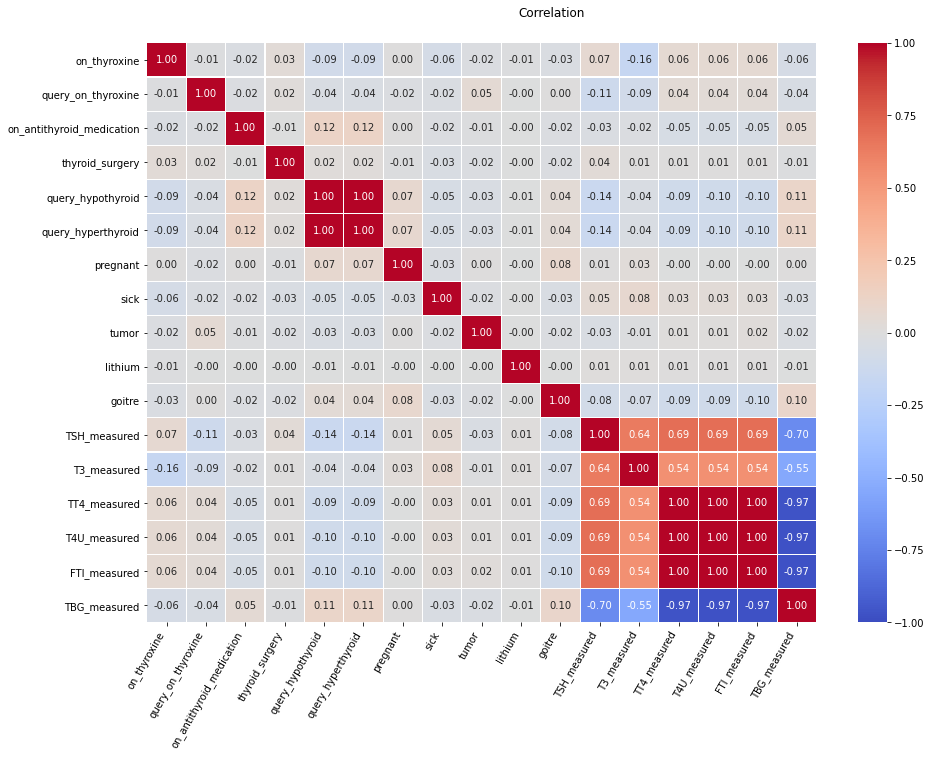

In [0]:

cor = f , ax = plt.subplots(figsize = (15,10))
corr = disease.corr()
cor = sns.heatmap(corr, annot = True, ax =ax ,vmin= -1 , vmax =1, cmap = "coolwarm", fmt = '.2f',linewidths= .05)
ax.set_xticklabels(ax.get_xticklabels(),rotation =60 , horizontalalignment = 'right')
f.subplots_adjust(top =0.93)
t = f.suptitle('Correlation')

Most of the data is uncorrelated. Hence there is no direct relationship between the variables.

# **5. DECISION TREES**

A decision tree is a flowchart-like structure in which each internal node represents a “test” on an attribute

### **a. Random Forest**

The random forest is a classification algorithm consisting of many decisions trees

> ***i). Dividing the Data into Test and training sets.***

In [0]:
#Making a new copy of  the columns used in predictions
#The dependent variables(features)
features = ['on_thyroxine','query_on_thyroxine',	'on_antithyroid_medication',	'thyroid_surgery',
                 'query_hypothyroid',	'query_hyperthyroid',	'pregnant',	'sick',	'tumor',
                 'lithium',	'goitre',	'TSH_measured',	'T3_measured',	'TT4_measured',	
                 'T4U_measured',	'FTI_measured',	'TBG_measured']

X = disease[features].values
#Confirming if we dropped the y variable sing head function

#using shape function


In [0]:
#The dependent variables(Y)
disease['status']= le.fit_transform(disease['status'])
y = disease['status'].copy()
#Confirming that the Y variable is only variable in the dependent
y.head()

0    0
1    0
2    0
3    0
4    0
Name: status, dtype: int64

***ii ). Splitting the Training and Testing  sets***

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 44)

In [0]:
print('Training the X Shape:', X_train.shape)
print('Training the Y Shape:', y_train.shape)
print('Testing the X Shape:', X_test.shape)
print('Testing the Y Shape:', y_test.shape)

Training the X Shape: (2314, 17)
Training the Y Shape: (2314,)
Testing the X Shape: (772, 17)
Testing the Y Shape: (772,)


In [0]:
rand = RandomForestClassifier()
#choosing our best parameters using Randomised search

search = RandomizedSearchCV(estimator= rand, param_distributions={'n_estimators': sp_randint(100,1000), 'min_samples_split': np.arange(2,20), 'max_depth': sp_randint(2,10)},
                      n_jobs=1, cv = 5)


***iii). Fitting in our split sets and check accuracy***

In [0]:
search.fit(X_train, y_train)
search.best_params_

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 582}

In [0]:
# fit model with the best parameters

rand = RandomForestClassifier(max_depth=9, min_samples_split=12, n_estimators=194, random_state= 50)
rand.fit(X_train, y_train)
y_pred = rand.predict(X_test)

print('accuracy = ', accuracy_score(y_test, y_pred))




accuracy =  0.9624352331606217


***iv). Visualise***

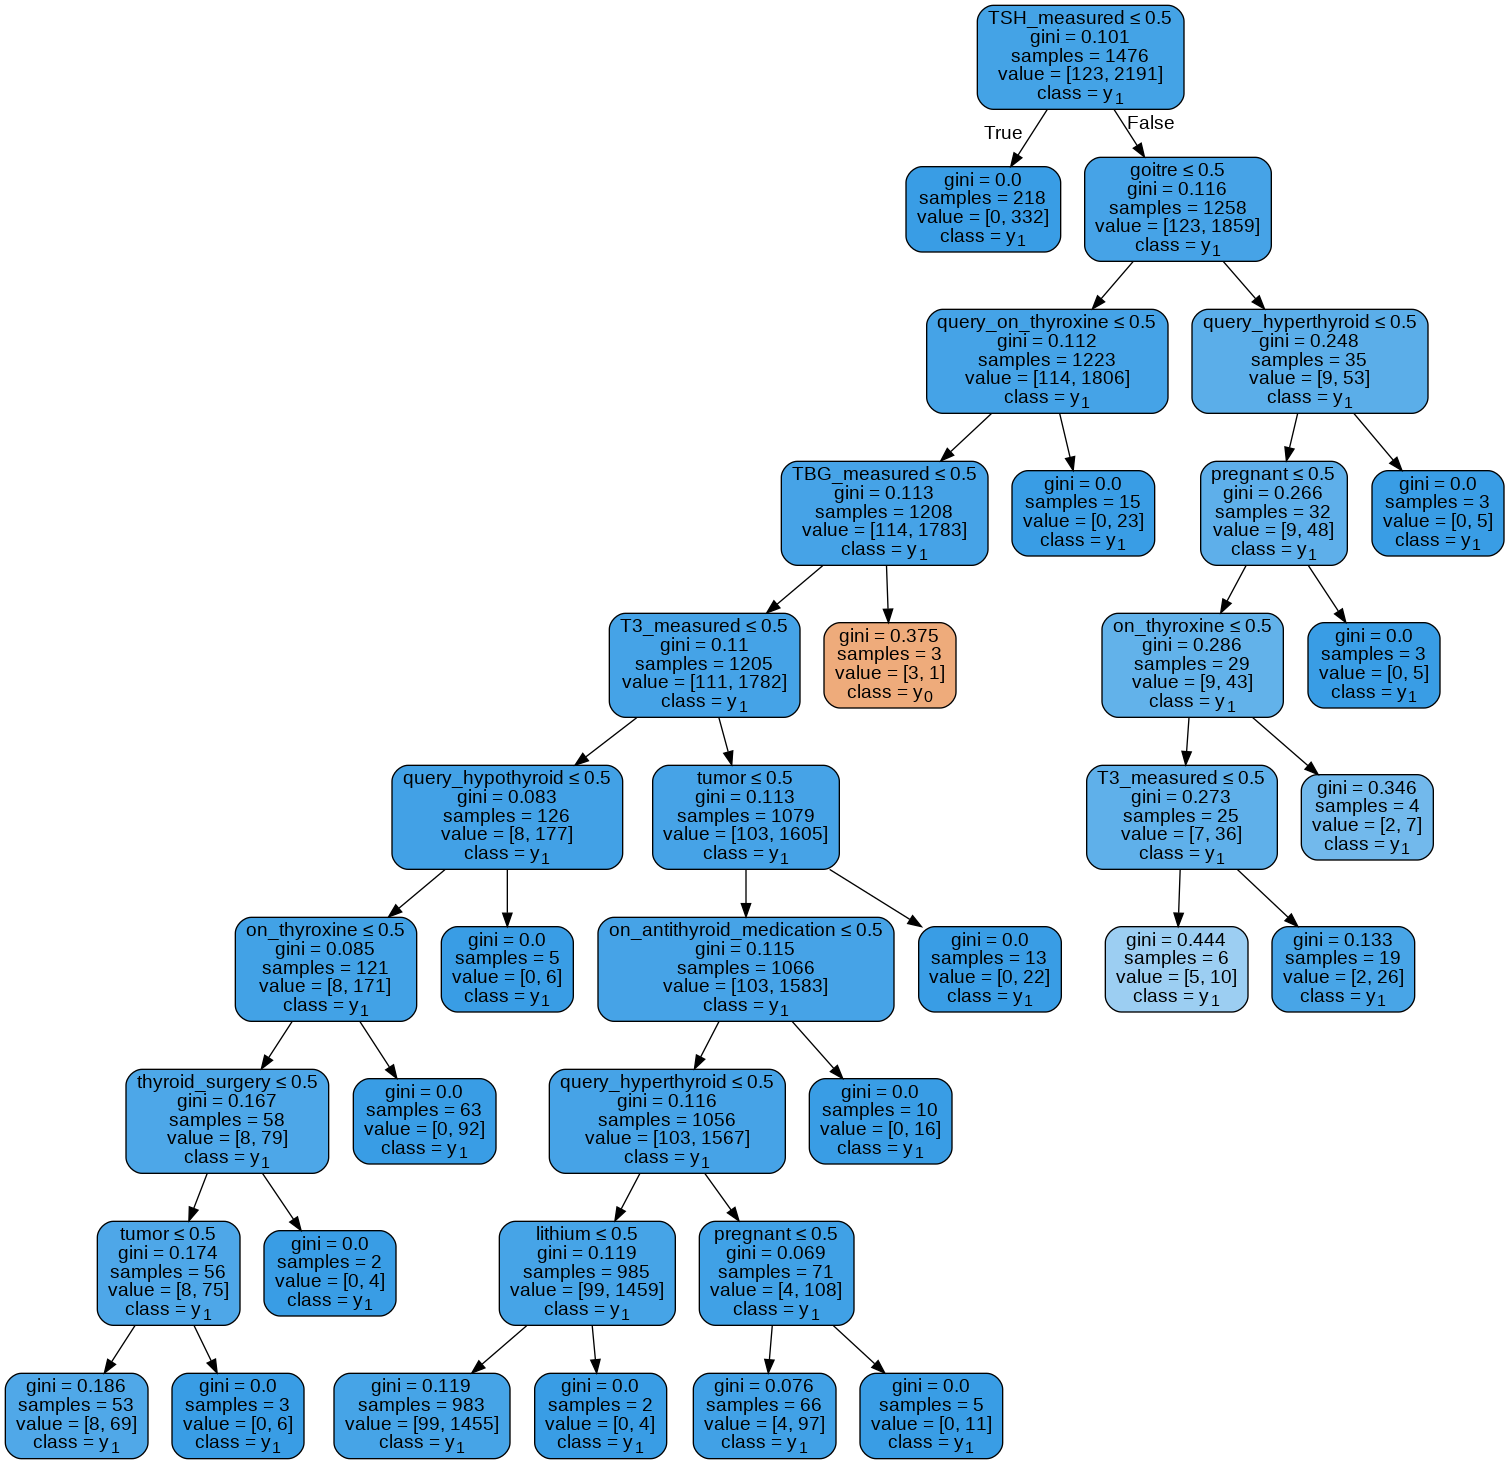

In [0]:
# We will now use the export_grapgviz to visualise the decision tree.

features = ['on_thyroxine','query_on_thyroxine',	'on_antithyroid_medication',	'thyroid_surgery',
                 'query_hypothyroid',	'query_hyperthyroid',	'pregnant',	'sick',	'tumor',
                 'lithium',	'goitre',	'TSH_measured',	'T3_measured',	'TT4_measured',	
                 'T4U_measured',	'FTI_measured',	'TBG_measured']

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
tree = rand.estimators_[50]
export_graphviz(tree, out_file = dot_data, filled = True, rounded = True,
                special_characters= True, feature_names=features, class_names= True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Disease')
Image(graph.create_png())

In [127]:
disease.dtypes

status                        int64
age                          object
sex                          object
on_thyroxine                  int64
query_on_thyroxine            int64
on_antithyroid_medication     int64
thyroid_surgery               int64
query_hypothyroid             int64
query_hyperthyroid            int64
pregnant                      int64
sick                          int64
tumor                         int64
lithium                       int64
goitre                        int64
TSH_measured                  int64
TSH                          object
T3_measured                   int64
T3                           object
TT4_measured                  int64
TT4                          object
T4U_measured                  int64
T4U                          object
FTI_measured                  int64
FTI                          object
TBG_measured                  int64
dtype: object

In [0]:
# We will create another model to make a prediction based on on_thyroxine

# Creating new values for our feature and labels variables

X = disease['on_thyroxine'].values.reshape(-1, 1)
y = disease['status'].values

# Splitting our data into training and test sets using a training size of 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# We will use a decision tree classifier to create our model
 #The interpreter saves the arguments for all supplied entries without interpretation in sys
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()



In [136]:
# Training it on our model
tree = tree.fit(X_train, y_train)

# Prediction based on the model we have just created and trained
y_pred_tree = tree.predict(X)

#comparison_frame = pd.DataFrame({'Actual': y_test.flatten()})#, 'Predicted': y_pred.flatten()})

#comparison_frame.describe()

print('accuracy = ', accuracy_score(y_test, y_pred_tree))

ValueError: ignored

In [0]:
#Y_pred errors

# **6. SUPPORT VECTOR MACHINES**

Support vector machine (abbreviated as SVM) is a supervised learning algorithm often used in classification.

***i). Splitting the data***

In [0]:
# Split data into the testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

# Standardize your data
sc = StandardScaler()
X_train = sc. fit_transform(X_train)
X_test = sc.fit_transform(X_test)

***ii). Linear Kernel Support Vector Machine***

Linear Kernel is used when the data is Linearly separable, that is, it can be separated using a single Line

In [141]:
# Import the Support Vector Classifier model
from sklearn.svm import SVC

#fit the model
#As stated our kernel here is Linear and our Gamma is auto. 
linear_ = SVC(kernel='linear', gamma='auto')
linear_.fit(X_train, y_train)

y_predicted = linear_.predict(X_test)

print('The accuracy of our model is \n ', accuracy_score(y_test, y_predicted))

The accuracy of our model is 
  0.948220064724919


***iii). Polynomial kernel Support Vector Machine***

polynomial kernel is a kernel function commonly used with support vector machines (SVMs) and other kernelized models, that represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables, **allowing learning of non-linear models.**

In [144]:
# Splitting  disease data into testing and training sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

# Standardize your data using the standard scaler.
sc = StandardScaler()
X_train = sc. fit_transform(X_train)
X_test = sc.fit_transform(X_test)


# Importing the Support Vector Classifier model
from sklearn.svm import SVC

#fit the model , we will try with a polynomial degree of 4.
poly_class = SVC(kernel='poly', degree=4 ,gamma='auto')
poly_class.fit(X_train, y_train)

y_pred = poly_class.predict(X_test)

print('The polynomial models accuracy is  \n ', accuracy_score(y_test, y_pred))

The polynomial models accuracy is  
  0.948220064724919


In [152]:
#We need to reduce the amount of Data used by Dimensionality reduction method. 
#We shall employ Principal Component Analysis(PCA).
# Applying the reduction algorithm: PCA
pca = PCA(n_components=1).fit(X)
X = pca.transform(X)
X.shape

(3086, 1)

In [149]:
# create a mesh to plot in

h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max),
                     np.arange(y_min, y_max))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = rbf_class.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Patient Classification with RBF SVC')

plt.show()

IndexError: ignored